Text(0.5, 1.0, 'Imagem Original')

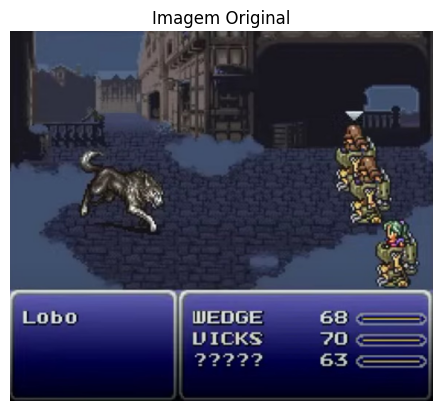

In [1]:
# Importação das bibliotecas
import cv2
import matplotlib.pyplot as plt
import easyocr
import numpy as np
from PIL import Image

dicionario = {
    'Combate': '..\\FFVI\\Combat\\combate.jpg',
    'Combate2': '..\\FFVI\\Combat\\combate2.jpg',
    'Combate3': '..\\FFVI\\Combat\\combate3.jpg',
    'teste': '..\\FFVI\\Dialog\\textbox_with_img.png',
    'teste2': '..\\FFVI\\Maps\\caverna_interior3.jpg',
    'teste3': '..\\FFVI\\Dialog\\texto_baixo.png',
}

escolha = 'Combate3' 

original_image = Image.open(dicionario[escolha])
cv2_img = np.array(original_image)
plt.imshow(cv2_img)
plt.axis('off')
plt.title('Imagem Original')


In [2]:
# Função para verificar a presença de uma cor azul significativa na região inferior da imagem
def verificar_cor_azul(image, threshold=0.55, region_fraction=0.3):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    height = mask.shape[0]
    region_height = int(height * region_fraction)
    mask_region = mask[height - region_height:, :]
    
    blue_ratio = np.sum(mask_region > 0) / mask_region.size
    print(f"Proporção de pixels azuis na região inferior: {blue_ratio}")
    
    plt.imshow(mask, cmap='gray')
    plt.title('Máscara de Cor Azul')
    plt.show()
    
    plt.imshow(mask_region, cmap='gray')
    plt.title('Máscara de Cor Azul na Região Inferior')
    plt.show()
    
    return blue_ratio > threshold

# Função para identificar combate na imagem
def identificar_combate(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    azul_presente = verificar_cor_azul(image)
    
    reader = easyocr.Reader(['en'])
    result = reader.readtext(image_rgb)
    
    detected_texts = []
    if len(result) > 0:
        last_bbox = None
        combined_text = ""
        max_x_distance = 25  # Ajuste conforme necessário
        max_y_distance = 10  # Ajuste conforme necessário
        
        for (bbox, text, prob) in result:
            if last_bbox is not None:
                # Verifica a proximidade dos bounding boxes
                x_distance = bbox[0][0] - last_bbox[2][0]
                y_distance = abs(bbox[0][1] - last_bbox[0][1])
                
                if x_distance < max_x_distance and y_distance < max_y_distance:
                    combined_text += " " + text
                else:
                    detected_texts.append(combined_text)
                    combined_text = text
            else:
                combined_text = text
            
            last_bbox = bbox
        
        # Adiciona o último texto combinado
        if combined_text:
            detected_texts.append(combined_text)
        
        for (bbox, text, prob) in result:
            top_left = tuple(map(int, bbox[0]))
            bottom_right = tuple(map(int, bbox[2]))
            cv2.rectangle(image_rgb, top_left, bottom_right, (0, 255, 0), 2)
            plt.text(top_left[0], top_left[1] - 10, text, bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')
    
    if len(detected_texts) > 0 and azul_presente:
        print("Combate detectado na imagem.")
        for text in detected_texts:
            print(text)
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title('Combate Detectado')
        plt.show()
        return detected_texts
    else:
        print("Nenhum combate detectado na imagem.")
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title('Sem Combate Detectado')
        plt.show()
        return []

Proporção de pixels azuis na região inferior: 0.5817312658532946


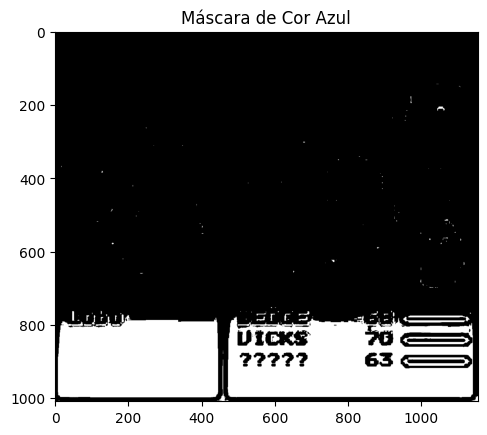

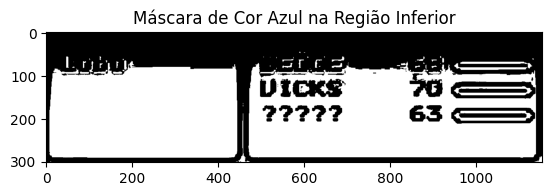

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Combate detectado na imagem.
Lobo
WEDGE
68
VICKS
70
22222
63


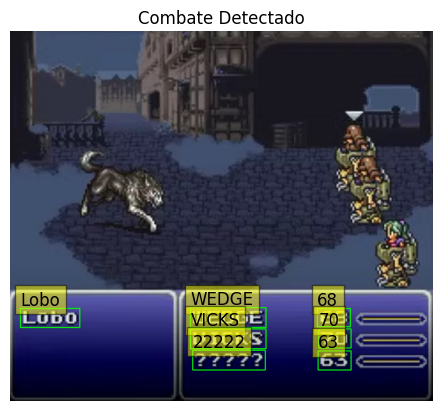

['Lobo', 'WEDGE', '68', 'VICKS', '70', '22222', '63']

In [3]:

# Caminho da imagem para teste
image_path = dicionario[escolha]  # Substituir pelo caminho da sua imagem

# Chamar a função para identificar combate na imagem
identificar_combate(image_path)
